<a href="https://colab.research.google.com/github/nikhildhavale/pythonLearning/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature matrix shape: (442, 10)
Target vector shape : (442,)
Feature names       : ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

First 5 rows:
      age       sex       bmi        bp        s1        s2        s3        s4        s5        s6  target
 0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401 -0.002592  0.019907 -0.017646   151.0
-0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412 -0.039493 -0.068332 -0.092204    75.0
 0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356 -0.002592  0.002861 -0.025930   141.0
-0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038  0.034309  0.022688 -0.009362   206.0
 0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142 -0.002592 -0.031988 -0.046641   135.0

Shapes after split:
X_train: (353, 10)   y_train: (353,)
X_test : (89, 10)   y_test : (89,)

Feature scaling done. Example column mean/std on train after scaling: 0.0 / 1.0

SVR (RBF) train

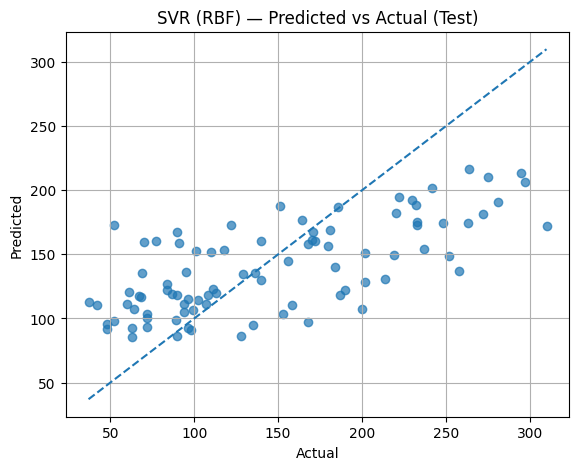

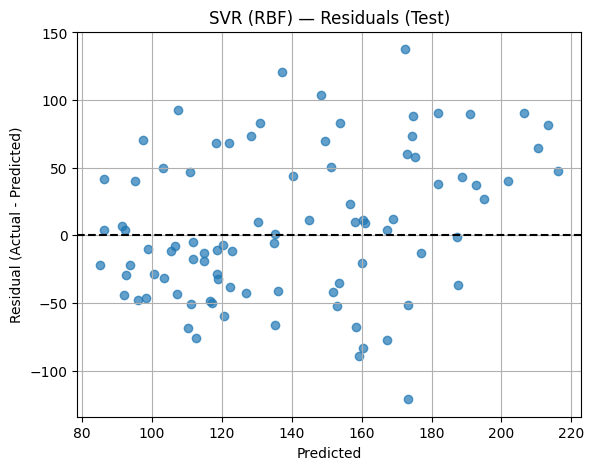


=== Kernel Comparison on Test ===
Kernel       MAE      RMSE      R^2
   RBF 45.002771 54.688644 0.435492
Linear 43.499896 54.960079 0.429875
 Poly3 49.333974 61.239551 0.292153

=== SVR (RBF) with y-scaling ===

Test  MAE : 46.382
Test  MSE : 3885.291
Test  RMSE: 62.332
Test  R^2 : 0.2667

Done.


In [2]:
#Code for SVM - Regression (Diabetes  dataset):

# ------------------------------------------------------------
# Support Vector Regression (SVR) on scikit-learn Diabetes data
# Google Colab friendly, with clear comments and plots
# ------------------------------------------------------------

# 1) IMPORTS
# ----------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make plots a bit nicer
plt.rcParams["figure.figsize"] = (6.5, 5)
np.random.seed(42)


# 2) LOAD DATA
# ------------
# The Diabetes dataset has 10 numeric features (already normalized in the raw dataset),
# and a continuous target 'y' measuring disease progression.
data = load_diabetes()
X = data.data               # shape: (442, 10)
y = data.target.astype(float)  # shape: (442,)

print("Feature matrix shape:", X.shape)
print("Target vector shape :", y.shape)
print("Feature names       :", list(data.feature_names))

# Optional: inspect as a DataFrame (handy for EDA)
df = pd.DataFrame(X, columns=data.feature_names)
df["target"] = y
print("\nFirst 5 rows:")
print(df.head().to_string(index=False))


# 3) TRAIN–TEST SPLIT
# -------------------
# Keep a hold-out test set for unbiased evaluation.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 80/20 split
    random_state=42
)

print("\nShapes after split:")
print("X_train:", X_train.shape, "  y_train:", y_train.shape)
print("X_test :", X_test.shape,  "  y_test :", y_test.shape)


# 4) FEATURE SCALING
# ------------------
# SVR is sensitive to feature scales. Even though this dataset is pre-normalized,
# we still fit a StandardScaler on the training split only to avoid data leakage
# and to keep a consistent pattern across demos.
x_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled  = x_scaler.transform(X_test)

print("\nFeature scaling done. Example column mean/std on train after scaling:",
      round(X_train_scaled[:, 0].mean(), 4), "/", round(X_train_scaled[:, 0].std(), 4))


# 5) BUILD & TRAIN SVR MODEL (RBF KERNEL)
# ---------------------------------------
# Key hyperparameters:
#  - C: regularization (higher C -> try to fit the training data more closely)
#  - epsilon: width of epsilon-insensitive tube (insensitivity to small errors)
#  - gamma: RBF kernel width (gamma='scale' is a good default)
svr_rbf = SVR(kernel="rbf", C=5.0, epsilon=0.3, gamma="scale")
svr_rbf.fit(X_train_scaled, y_train)

print("\nSVR (RBF) trained.")
print("Number of support vectors:", len(svr_rbf.support_),
      f"({len(svr_rbf.support_) / X_train_scaled.shape[0]*100:.1f}% of training samples)")


# 6) PREDICT & EVALUATE
# ---------------------
y_pred_train = svr_rbf.predict(X_train_scaled)
y_pred_test  = svr_rbf.predict(X_test_scaled)

def regression_report(y_true, y_pred, label=""):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{label}MAE : {mae:.3f}")
    print(f"{label}MSE : {mse:.3f}")
    print(f"{label}RMSE: {rmse:.3f}")
    print(f"{label}R^2 : {r2:.4f}")

print("\n=== Performance (RBF SVR) ===")
regression_report(y_train, y_pred_train, label="Train ")
regression_report(y_test,  y_pred_test,  label="Test  ")


# 7) DIAGNOSTIC PLOTS
# -------------------
# (a) Predicted vs Actual
plt.figure()
plt.scatter(y_test, y_pred_test, alpha=0.7)
min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("SVR (RBF) — Predicted vs Actual (Test)")
plt.grid(True)
plt.show()

# (b) Residual plot (errors vs predictions)
residuals = y_test - y_pred_test
plt.figure()
plt.scatter(y_pred_test, residuals, alpha=0.7)
plt.axhline(0.0, color="black", linestyle="--")
plt.xlabel("Predicted")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("SVR (RBF) — Residuals (Test)")
plt.grid(True)
plt.show()


# 8) OPTIONAL: QUICK KERNEL COMPARISON
# ------------------------------------
# Train linear and polynomial kernels for a fast, side-by-side metric comparison.
svr_linear = SVR(kernel="linear", C=10.0, epsilon=0.1)
svr_poly   = SVR(kernel="poly", degree=3, C=10.0, epsilon=0.1, gamma="scale")

svr_linear.fit(X_train_scaled, y_train)
svr_poly.fit(X_train_scaled, y_train)

preds = {
    "RBF"   : svr_rbf.predict(X_test_scaled),
    "Linear": svr_linear.predict(X_test_scaled),
    "Poly3" : svr_poly.predict(X_test_scaled),
}

rows = []
for name, yp in preds.items():
    rows.append({
        "Kernel": name,
        "MAE": mean_absolute_error(y_test, yp),
        "RMSE": np.sqrt(mean_squared_error(y_test, yp)),
        "R^2": r2_score(y_test, yp)
    })
compare_df = pd.DataFrame(rows).sort_values("R^2", ascending=False)

print("\n=== Kernel Comparison on Test ===")
print(compare_df.to_string(index=False))


# 9) OPTIONAL: SCALE THE TARGET (can help some regressors, including SVR)
# -----------------------------------------------------------------------
# Using TransformedTargetRegressor to standardize y during training and invert on prediction.
from sklearn.compose import TransformedTargetRegressor

svr_rbf_y_scaled = TransformedTargetRegressor(
    regressor=SVR(kernel="rbf", C=10.0, epsilon=0.1, gamma="scale"),
    transformer=StandardScaler()
)
svr_rbf_y_scaled.fit(X_train_scaled, y_train)
y_pred_test_yScaled = svr_rbf_y_scaled.predict(X_test_scaled)

print("\n=== SVR (RBF) with y-scaling ===")
regression_report(y_test, y_pred_test_yScaled, label="Test  ")

print("\nDone.")

